In [1]:
!nvidia-smi

Tue Dec 13 18:24:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.72       Driver Version: 512.72       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8    10W /  N/A |     13MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))
print("1.",tf.test.is_gpu_available)
print("2",tf.test.gpu_device_name)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# sess = tf.compat.v1.Session(config=tf.ConfigProto(log_device_placement=True))


Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1. <function is_gpu_available at 0x00000172141B4C18>
2 <function gpu_device_name at 0x00000172141B30D8>
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15724100635275028739
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3665166336
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13731008997617887133
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


!pip install opencv-python

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import numpy as np 
import pandas as pd
import cv2
import os

from matplotlib import pyplot as plt

# Image Extraction
    - Folder:
        1. Anger
        2. Contempt
        3. Disgust
        4. Fear
        5. Happy
        6. Sadness
        7. Surprise 

In [5]:
data_loc = 'Dataset/FER/train'
data_dir = os.listdir(data_loc)
print(data_dir)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [6]:
image_list_arr = []
OTSU_scale_img = []
TRIANGLE_scale_img = []
for emotion_dirs in data_dir:
    emotions = os.listdir(data_loc+'/'+emotion_dirs)
#     print("emotions",emotions)
    for images in emotions:
        img_read = cv2.imread(data_loc+'/'+emotion_dirs+'/'+images)
        img_read_resize = cv2.resize(img_read,(64,64))
#         RGB = cv2.cvtColor(img_read_resize, cv2.COLOR_BGR2GRAY)
#         ret2, thres2 = cv2.threshold(RGB, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#         ret3, thres3 = cv2.threshold(RGB, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
#         ret, thres = cv2.threshold(RGB, ret2, 255, cv2.THRESH_BINARY)

#         print("ret",ret)
#         print("ret2",ret2)
#         print("ret3",ret3)

#         OTSU_scale_img.append(thres2)
#         TRIANGLE_scale_img.append(thres3)
        image_list_arr.append(img_read_resize)


# Threshold Representation (OTSU)

In [7]:
# plt.imshow(OTSU_scale_img[5])

In [8]:
# plt.imshow(OTSU_scale_img[5],cmap="gray")

# Threshold Representation (TRIANGLE)

In [9]:
# plt.imshow(TRIANGLE_scale_img[5])

In [10]:
# plt.imshow(TRIANGLE_scale_img[5],cmap="gray")

# Final Segmentation method selection (OTSU)

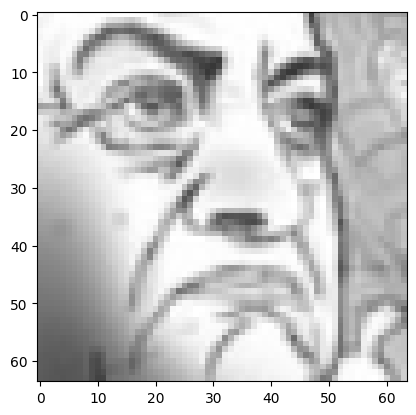

In [11]:
plt.imshow(image_list_arr[5])

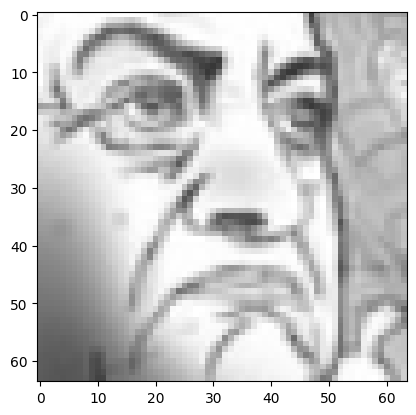

In [12]:
plt.imshow(image_list_arr[5],cmap="gray")

In [13]:
loaded_img_data = np.array(image_list_arr)
loaded_img_data

array([[[[ 46,  46,  46],
         [ 38,  38,  38],
         [ 31,  31,  31],
         ...,
         [ 12,  12,  12],
         [ 16,  16,  16],
         [ 22,  22,  22]],

        [[ 49,  49,  49],
         [ 37,  37,  37],
         [ 27,  27,  27],
         ...,
         [ 11,  11,  11],
         [ 15,  15,  15],
         [ 21,  21,  21]],

        [[ 50,  50,  50],
         [ 36,  36,  36],
         [ 24,  24,  24],
         ...,
         [ 15,  15,  15],
         [ 17,  17,  17],
         [ 21,  21,  21]],

        ...,

        [[211, 211, 211],
         [198, 198, 198],
         [169, 169, 169],
         ...,
         [195, 195, 195],
         [202, 202, 202],
         [204, 204, 204]],

        [[211, 211, 211],
         [203, 203, 203],
         [183, 183, 183],
         ...,
         [186, 186, 186],
         [195, 195, 195],
         [198, 198, 198]],

        [[208, 208, 208],
         [203, 203, 203],
         [190, 190, 190],
         ...,
         [174, 174, 174],
        

RGB values are usually stored as integers to save memory. But doing math on colors is usually done in float because it's easier, more powerful, and more precise. The act of converting floats to integers is called "Quantization", and it throws away precision.

Typically, RGB values are encoded as 8-bit integers, which range from 0 to 255. It's an industry standard to think of 0.0f as black and 1.0f as white (max brightness). To convert [0, 255] to [0.0f, 1.0f] all you have to do is divide by 255.0f.

If you care, this is the formula to convert back to integer: (int)floor(x * 255.0f + 0.5f). But first clamp x to [0.0f, 1.0f] if necessary.

In [14]:
loaded_img_data = loaded_img_data.astype('float32')
loaded_img_data

array([[[[ 46.,  46.,  46.],
         [ 38.,  38.,  38.],
         [ 31.,  31.,  31.],
         ...,
         [ 12.,  12.,  12.],
         [ 16.,  16.,  16.],
         [ 22.,  22.,  22.]],

        [[ 49.,  49.,  49.],
         [ 37.,  37.,  37.],
         [ 27.,  27.,  27.],
         ...,
         [ 11.,  11.,  11.],
         [ 15.,  15.,  15.],
         [ 21.,  21.,  21.]],

        [[ 50.,  50.,  50.],
         [ 36.,  36.,  36.],
         [ 24.,  24.,  24.],
         ...,
         [ 15.,  15.,  15.],
         [ 17.,  17.,  17.],
         [ 21.,  21.,  21.]],

        ...,

        [[211., 211., 211.],
         [198., 198., 198.],
         [169., 169., 169.],
         ...,
         [195., 195., 195.],
         [202., 202., 202.],
         [204., 204., 204.]],

        [[211., 211., 211.],
         [203., 203., 203.],
         [183., 183., 183.],
         ...,
         [186., 186., 186.],
         [195., 195., 195.],
         [198., 198., 198.]],

        [[208., 208., 208.],
       

In [15]:
loaded_img_data = loaded_img_data/255
loaded_img_data

array([[[[0.18039216, 0.18039216, 0.18039216],
         [0.14901961, 0.14901961, 0.14901961],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.08627451, 0.08627451, 0.08627451]],

        [[0.19215687, 0.19215687, 0.19215687],
         [0.14509805, 0.14509805, 0.14509805],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.04313726, 0.04313726, 0.04313726],
         [0.05882353, 0.05882353, 0.05882353],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.14117648, 0.14117648, 0.14117648],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.06666667, 0.06666667, 0.06666667],
         [0.08235294, 0.08235294, 0.08235294]],

        ...,

        [[0.827451  , 0.827451  , 0.827451  ],
         [0.7764706 , 0.7764706 , 0.7764706 ]

In [16]:
loaded_img_data.shape

(35887, 64, 64, 3)

In [17]:
loaded_img_data

array([[[[0.18039216, 0.18039216, 0.18039216],
         [0.14901961, 0.14901961, 0.14901961],
         [0.12156863, 0.12156863, 0.12156863],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.08627451, 0.08627451, 0.08627451]],

        [[0.19215687, 0.19215687, 0.19215687],
         [0.14509805, 0.14509805, 0.14509805],
         [0.10588235, 0.10588235, 0.10588235],
         ...,
         [0.04313726, 0.04313726, 0.04313726],
         [0.05882353, 0.05882353, 0.05882353],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.19607843, 0.19607843, 0.19607843],
         [0.14117648, 0.14117648, 0.14117648],
         [0.09411765, 0.09411765, 0.09411765],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.06666667, 0.06666667, 0.06666667],
         [0.08235294, 0.08235294, 0.08235294]],

        ...,

        [[0.827451  , 0.827451  , 0.827451  ],
         [0.7764706 , 0.7764706 , 0.7764706 ]

In [18]:
# loaded_img_data = np.repeat(loaded_img_data[..., np.newaxis], 3, -1)
loaded_img_data.shape[0]

35887

In [19]:
num_of_samples = loaded_img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:4953]=0 #135
labels[4954:5500]=1 #54
labels[5501:10621]=2 #177
labels[10622:19610]=3 #75
labels[19611:25808]=4 #207
labels[25809:31885]=5 #84
labels[31886:35887]=6 #249

names = ['anger','disgust','fear','happy','neutral','sad','surprise']

def getLabel(id):
    return  ['anger','disgust','fear','happy','neutral','sad','surprise'][id]


In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization


In [21]:
from tensorflow.keras.utils import to_categorical
num_classes = 7
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(loaded_img_data,Y, random_state=8)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=8)
x_test=X_test
print(y_train.shape)

# y_train = to_categorical(y_train, 3)
# y_test = to_categorical(y_test, 3)

(28709, 7)


In [22]:
from keras.preprocessing.image import ImageDataGenerator

#Callbacks
c2=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=6,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.001
)
# nClasses=3

emotion_train_gen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_data_emotion=emotion_train_gen.flow(X_train,y_train, batch_size=64, shuffle=True)
emotion_val_gen=ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_data_emotion=emotion_train_gen.flow(X_test,y_test, batch_size=64, shuffle=True)

In [23]:
from tensorflow.keras.models import *
from sklearn.model_selection import *
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *

base_Neural_Net= ResNet50(input_shape=(64,64,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_Neural_Net)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

for layer in base_Neural_Net.layers:
    layer.trainable = False

!pip install livelossplot

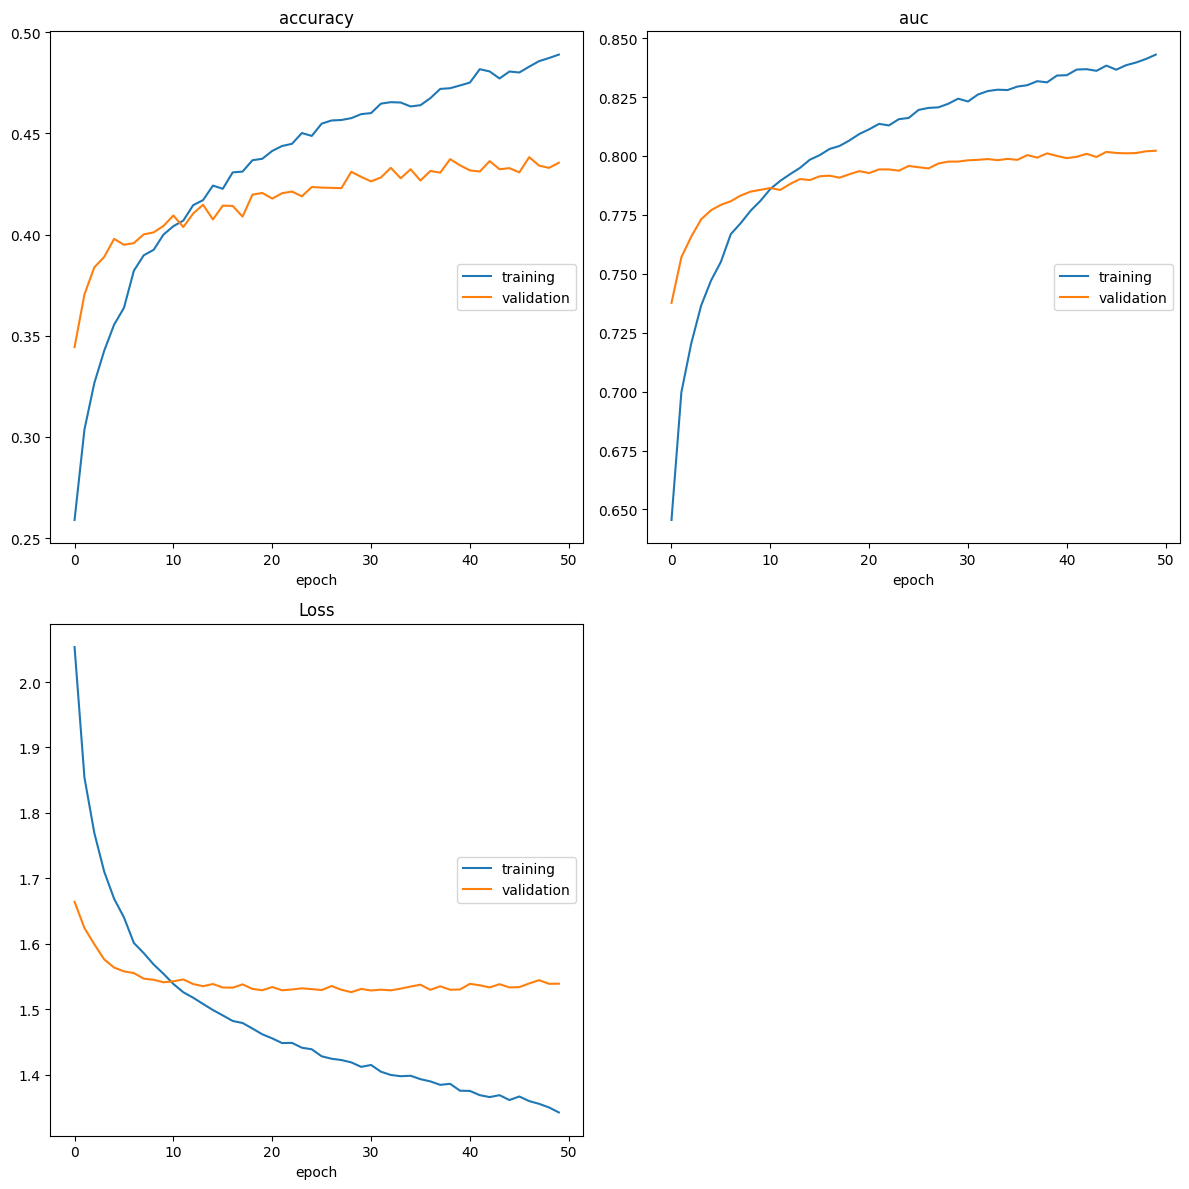

accuracy
	training         	 (min:    0.259, max:    0.489, cur:    0.489)
	validation       	 (min:    0.344, max:    0.438, cur:    0.435)
auc
	training         	 (min:    0.646, max:    0.843, cur:    0.843)
	validation       	 (min:    0.738, max:    0.802, cur:    0.802)
Loss
	training         	 (min:    1.342, max:    2.053, cur:    1.342)
	validation       	 (min:    1.526, max:    1.664, cur:    1.539)


In [24]:
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras

opt = Adam(lr=0.0001)
c1=PlotLossesKeras()
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy','AUC'])
history=model.fit(X_train,y_train,epochs=50,callbacks=[c1,c3],batch_size=64,validation_data=(X_test, y_test))

# from keras import callbacks
# filename='model_train_new.csv'
# filepath="C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/checkpoints.hdf5"

# csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
# checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# callbacks_list = [csv_log,checkpoint]
# callbacks_list = [csv_log]
# hist = model.fit(X_train, y_train, batch_size=2, epochs=25, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

In [25]:

model.evaluate(X_test,y_test,callbacks=[c2,c3],batch_size=64)

113/113 [==============================] - 2s 18ms/step - loss: 1.5388 - accuracy: 0.4355 - auc: 0.8022


[1.5388387441635132, 0.43549734354019165, 0.8022293448448181]

In [26]:
model.save("FER_ResNet50.h5")

C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [36]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import *

models=load_model("FER_ResNet50.h5")

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predict_x=models.predict(X_test) 
results=np.argmax(predict_x,axis=1)

# results = models.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
# cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]

label_mapdisgust = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
import seaborn as sns
import pandas as pd
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )
final_cm = cm_df

# y_pred8=model.predict_classes(x_test)
y_test8=[np.argmax(x) for x in y_test]
print('\t\tClassification Report For ResNet50:\n', classification_report(y_test8, results,target_names=label_mapdisgust))


ValueError: in user code:

    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\dhruv\anaconda3\envs\tensor\lib\site-packages\keras\engine\input_spec.py:269 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer sequential: expected shape=(None, 128, 128, 3), found shape=(None, 64, 64, 3)


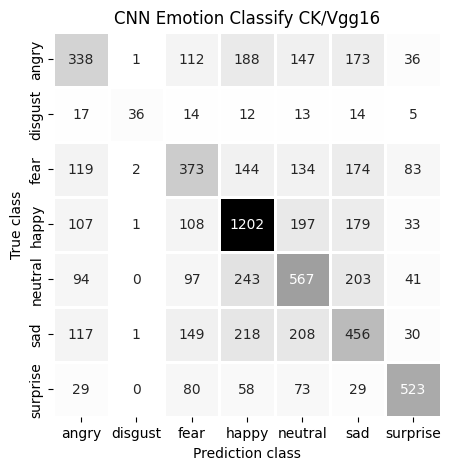

In [38]:
plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify ResNet50')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [31]:
from PIL import Image
import glob

def predictor(filename) :
    test_image = filename
    image_result = Image.open(test_image)
    # test_image = image.load_img(test_image, target_size=(100,100))
    test_image = image.load_img(test_image, target_size=(48,48,3))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis=0)
    result = models.predict(test_image)
    r = np.max(result)
    per = r*100
    percentage = round(per,4)
    categories = ['anger','contempt','disgust','fear','happy','sadness','surprise']
    image_result = plt.imshow(image_result)
    output = categories[np.argmax(result)]
#     output = np.argmax(result)
    return result,percentage,output
EMOTION_DETECTOR = predictor('C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/FER/test/happy/PrivateTest_3402902.jpg')
print(EMOTION_DETECTOR)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/dhruv/Desktop/SEM 2/Applied AI/Proj B/Dataset/FER/test/happy/PrivateTest_3402902.jpg'

In [ ]:
from mtcnn import MTCNN
from PIL import Image
import glob
# load face detector
detector = MTCNN()


In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def detect_face(img):
    
    mt_res = detector.detect_faces(img)
    return_res = []
    
    for face in mt_res:
        x, y, width, height = face['box']
        center = [x+(width/2), y+(height/2)]
        max_border = max(width, height)
        
        # center alignment
        left = max(int(center[0]-(max_border/2)), 0)
        right = max(int(center[0]+(max_border/2)), 0)
        top = max(int(center[1]-(max_border/2)), 0)
        bottom = max(int(center[1]+(max_border/2)), 0)
        
        # crop the face
        center_img_k = img[top:top+max_border, 
                           left:left+max_border, :]
        center_img = np.array(Image.fromarray(center_img_k).resize([64, 64]))
        print("center_img--------------",center_img)

        # create predictions
#         sex_preds = sex_model.predict(center_img.reshape(1,224,224,3))[0][0]
#         age_preds = age_model.predict(center_img.reshape(1,224,224,3))[0][0]

#         test_image = image.load_img(center_img, target_size=(64,64,3))
        test_image = image.img_to_array(center_img)
        test_image = test_image/255
        test_image = np.expand_dims(test_image, axis=0)
        emotion_preds = models.predict(test_image)
        
        # convert to grey scale then predict using the emotion model
#         grey_img = np.array(Image.fromarray(center_img_k).resize([256, 256]))
#         emotion_preds = models.predict(center_img.reshape(1,64,64, 3))
        
        # output to the cv2
        return_res.append([top, right, bottom, left, emotion_preds])
#         return_res.append([top, right, bottom, left, sex_preds, age_preds, emotion_preds])
        
    return return_res

In [ ]:
# Get a reference to webcam 
video_capture = cv2.VideoCapture(0)
# print("video_capture--------------",video_capture)

emotion_dict = {
    0: 'anger',
    1: 'disgust', 
    2: 'fear',
    3: 'happy',
    4: 'neutral',
    5: 'sad',
    6: 'surprise'
}

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()
    print("--------------",frame.shape)
    # Convert the image from BGR color (which OpenCV uses) to RGB color 
    rgb_frame = frame[:, :, ::-1]
    print("rgb_frame--------------",rgb_frame.shape)
    # Find all the faces in the current frame of video
    face_locations = detect_face(rgb_frame)
    print("face_locations--------------",face_locations)

    # Display the results
    for top, right, bottom, left, emotion_preds in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        
#         sex_text = 'Female' if sex_preds > 0.5 else 'Male'
#         cv2.putText(frame, 'Sex: {}({:.3f})'.format(sex_text, sex_preds), (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
#         cv2.putText(frame, 'Age: {:.3f}'.format(age_preds), (left, top-25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
        cv2.putText(frame, 'Emotion: {}({:.3f})'.format(emotion_dict[np.argmax(emotion_preds)], np.max(emotion_preds)), (left, top-40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)
        
    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

In [ ]:
X_test

In [ ]:
labels[25555]

In [ ]:
y_pred8=models.predict(X_test)
y_pred8[0]

In [ ]:
y_test8=[np.argmax(x) for x in y_test]
y_pred8[0]

In [ ]:
y_test

In [30]:
num_of_samples

35887